In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import hydroeval
from src import load_data, evaluate
import netCDF4 as nc

In [24]:
vic_predictions = pd.read_csv('../data/GRIP-E_Hydrographs_VIC-GRU_test2012+2013.csv').drop(['time', 'hour', 'precip [mm/day]'], axis=1)
subid2gauge = pd.read_csv('../data/VIC-GRU_subid2gauge.csv')[['SubId', 'ID']].set_index('SubId')

In [55]:
vic_predictions = vic_predictions.rename(lambda c: subid2gauge.loc[int(c[3:6])].values[0] if c not in ['date', 'hour', 'precip [mm/day]'] else c, axis=1)
vic_predictions = vic_predictions.set_index('date').transpose().unstack().reset_index().rename({'level_0': 'date', 'level_1': 'station', 0: 'vic_prediction'}, axis=1)
vic_predictions['date'] = pd.to_datetime(vic_predictions['date'])

In [32]:
ground_truth = load_data.load_discharge_gr4j_vic()
ground_truth = ground_truth[~pd.isna(ground_truth['runoff'])]

In [56]:
data = pd.merge(ground_truth, vic_predictions, on=['date', 'station'])
data = data[data['date'] > '2011-12-31']

04159492 NSE: 0.44339081617897713	MSE: 186.9189437617151
04200500 NSE: 0.37907849128489446	MSE: 600.0534887392884
04161820 NSE: -0.4080744637875533	MSE: 40.30616034002646
04174500 NSE: -1.0503904194794251	MSE: 204.40316142752812
02GC010 NSE: 0.260510901557614	MSE: 32.7716233385348
02GE007 NSE: 0.3038301703503842	MSE: 18.7217099550387
02GD004 NSE: 0.2500522242983869	MSE: 30.386065133730515
04214500 NSE: 0.3211932689346605	MSE: 82.77671324652592
04213000 NSE: 0.43657042816717406	MSE: 101.62289712574575
02GG009 NSE: 0.2518105871078067	MSE: 84.34950788473654
02GA010 NSE: 0.1744341292233743	MSE: 292.4476956503608
04176500 NSE: 0.1466686540326746	MSE: 514.2561221668161
04177000 NSE: 0.5065573974254147	MSE: 11.804180229033133
02GA047 NSE: -0.37949261070576834	MSE: 86.23378175036214
02GC018 NSE: 0.022497637343862786	MSE: 51.14699372874003
04166500 NSE: -4.5791606112231085	MSE: 151.0293085754293
04207200 NSE: 0.4184639393426498	MSE: 14.899819607220289
04160600 NSE: 0.48708296299365794	MSE: 11.3

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


02GC007 NSE: -2.298617406944252	MSE: 84.5175356097731
04208504 NSE: 0.33952332268089325	MSE: 708.4680196425944
04199000 NSE: 0.31979046928653454	MSE: 607.686467097038
02GG002 NSE: 0.386637095661162	MSE: 109.07642138388505
04213500 NSE: 0.36167878651281415	MSE: 551.707804661493
02GA038 NSE: 0.19103970583285423	MSE: 98.80266721582983
04198000 NSE: 0.5447594441262817	MSE: 2603.89465786438
04197100 NSE: 0.5380830246955024	MSE: 39.57385024542582
02GB007 NSE: 0.014211596305639729	MSE: 23.09446914131297
04165500 NSE: 0.043248519089716386	MSE: 338.13867128039135
02GG013 NSE: 0.23136225084090412	MSE: 22.174289322828333
02GC002 NSE: 0.28922866043218565	MSE: 66.80060498454905
04212100 NSE: 0.5020565556272634	MSE: 832.3801561390563
04199500 NSE: 0.34949593825010994	MSE: 265.78379409342557
04196800 NSE: 0.4796616830675464	MSE: 121.79023420110437
04166100 NSE: -13.120719893798542	MSE: 80.58507002513944
02GG003 NSE: 0.4820731406018466	MSE: 185.52051733915778
04164000 NSE: -0.2361847630777698	MSE: 168

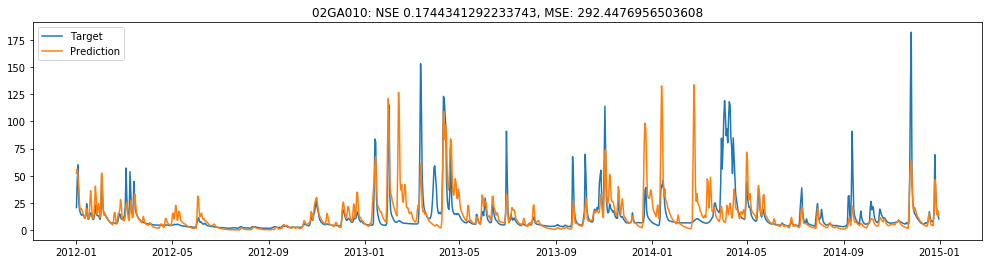

In [58]:
plot_list = ['02GA010']
nse_list, mse_list = [], []
for station in data['station'].unique():
    station_data = data[data['station']==station].set_index('date')
    
    nse, mse = evaluate.evaluate_daily(station, station_data[['vic_prediction']], station_data['runoff'], plot=station in plot_list)
    nse_list.append(nse)
    mse_list.append(mse)
    print('{} NSE: {}\tMSE: {}'.format(station, nse, mse))

print('Median NSE (clipped to 0)', np.median(nse_list), '/ Min', np.min(nse_list), '/ Max', np.max(nse_list))
print('Median MSE (clipped to 0)', np.median(mse_list), '/ Min', np.min(mse_list), '/ Max', np.max(mse_list))